<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/0-Introduction/Triangular_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approximating a triangular function as a sum of sines and cosines#

In [1]:
import matplotlib.pylab as plt
import numpy as np
import time
from IPython.core.display import clear_output
from IPython.core.display import display

Now set up the x-values for the function:

In [2]:
# create list of x values    
t=np.arange(-np.pi,np.pi,0.01)  

Now list the frequencies and amplitudes of the waves we will use to build up our mystery wave:

In [3]:
# frequency and amplitudes to build up our mystery wave
freqs = np.arange(1.0,20.,2.)
Cn = np.array([(3.46565342017-254.737095318j),
        (-1.16644367406+28.4709770497j),
        (0.685571832259-10.0922164294j),
        (-0.504127833607+5.240586586j),
        (0.376217427242-3.07367121897j),
        (-0.323123561657+2.1187342583j),
        (0.256920499162-1.44821668795j),
        (-0.238383315852+1.1331307276j),
        (0.193524671284-0.829332009977j),
        (-0.189110706279+0.69953977579j)])

Again, lets successively add up a series of sine and cos functions to make an ever-better approximation of our new mystery function:

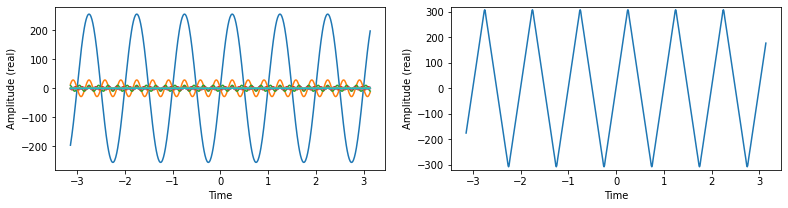

In [4]:
# create plot
f, ax = plt.subplots(1,2,figsize=[13,3])

# set maximum number of iterations
i_max = 20

# initialise our function
wave = 0.0

# for each iteration...
for i in range(0,len(Cn)):
    # new component   
    wave_amp = Cn[i]
    wave_freq = freqs[i]
    component = wave_amp*np.cos(2.*np.pi*t*wave_freq)+1.0j*wave_amp*np.sin(2.*np.pi*t*wave_freq) 
    
    # add that component to our existing wave
    wave = wave+component
    
    # plot the new component on the left, the sum on the right
    ax[0].plot(t,component.real)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude (real)')

    ax[1].plot(t,wave.real)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Amplitude (real)')
    ax[1].set_ylim(-320,320)
    
    # show the plot, then get ready for the next plot
    plt.draw()
    time.sleep(2.0)
    clear_output(wait=True)
    display(f)
    ax[1].cla()
    
plt.close()

What were the frequencies and amplitudes of the sine and cosine functions used to build up the triangle function?
Lets plot them (just the real parts).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Amplitude (real)')

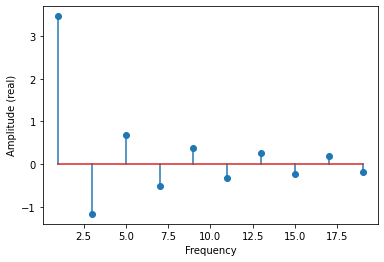

In [5]:
plt.stem(freqs,Cn.real)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (real)')

###In summary...###

To summarise what we're seen here:
The triangle function can be approximated by the sum of a series of functions:

$$C_n \cos(2\pi t f) + i \; C_n \sin(2\pi t f)$$ 

These are called the harmonics of the triangle function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Frequency domain')

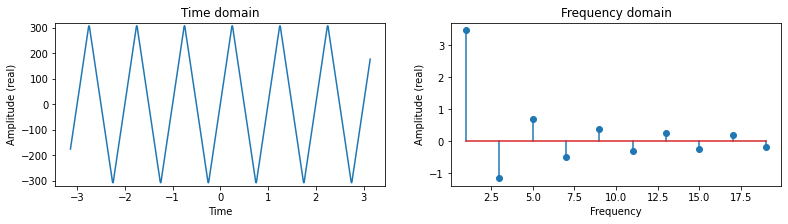

In [6]:
# create plot
f, ax = plt.subplots(1,2,figsize=[13,3])

# triangle function
ax[0].plot(t,wave.real)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude (real)')
ax[0].set_ylim(-320,320)
ax[0].set_title('Time domain')

# harmonics
ax[1].stem(freqs,Cn.real)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Amplitude (real)')
ax[1].set_title('Frequency domain')